# Data Science Internship

## Task3 - Car Price Prediction with Machine Learning

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

### Intern - Shweta Alukuru Trikutam

# 1. Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Reading and Understanding the Dataset

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df.shape

(301, 9)

## 2.1 Checking for Missing Values

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

> No missing values

# 3. Exploratory Data Analysis (EDA) and Data PreProcessing

In [8]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

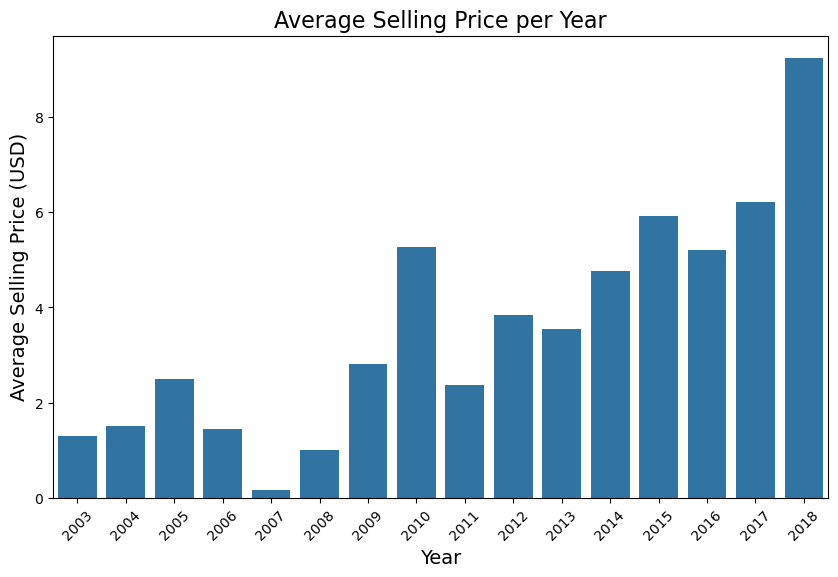

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Year', y='Selling_Price', estimator=np.mean, ci=None)  # Using np.mean to calculate the average

# Add labels and title
plt.title('Average Selling Price per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Selling Price (USD)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability if needed

# Show the plot
plt.show()

> The highest Average `Selling Price` can be seen in Year `2018`

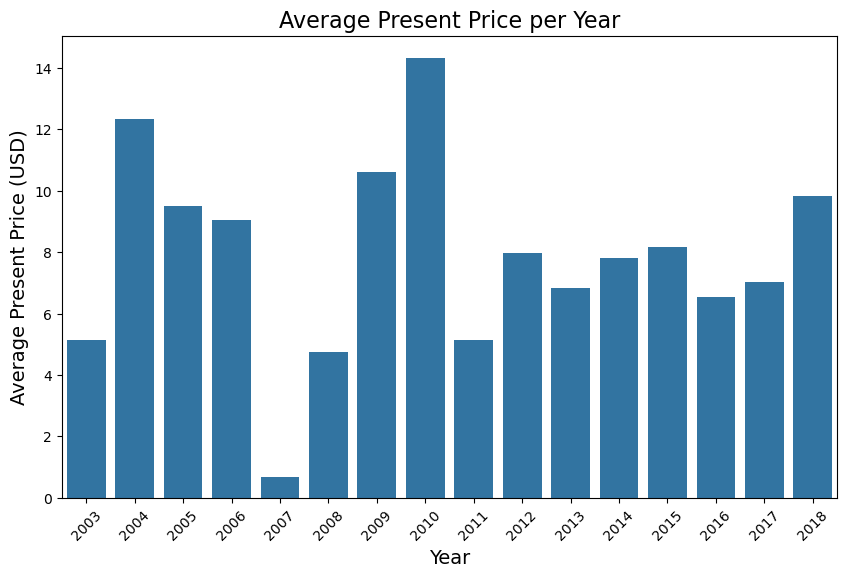

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Year', y='Present_Price', estimator=np.mean, ci=None)  # Using np.mean to calculate the average

# Add labels and title
plt.title('Average Present Price per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Present Price (USD)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability if needed

# Show the plot
plt.show()

In [11]:
# Selling cars in each year
year_wise_selling = df.groupby('Year')['Car_Name'].value_counts().sort_values(ascending=False).reset_index()
year_wise_selling.head(10)

,Year,Car_Name,count
0,2015,city,8
1,2016,city,7
2,2015,grand i10,5
3,2015,ciaz,5
4,2016,jazz,5
5,2012,verna,5
6,2013,verna,4
7,2015,brio,4
8,2013,corolla altis,4
9,2014,amaze,4


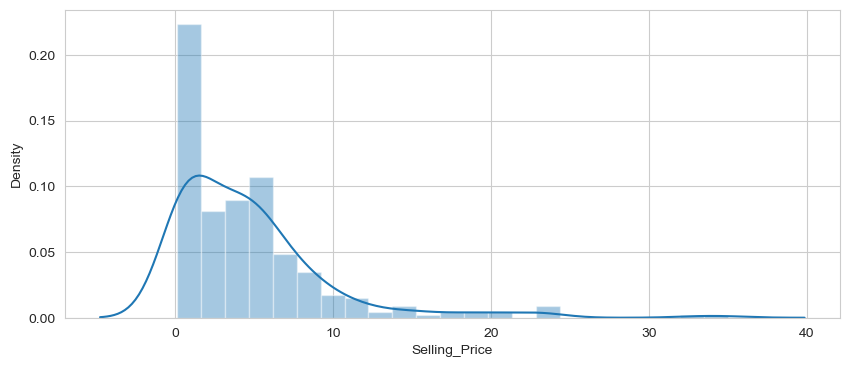

In [12]:
# Distribution of values for Selling Price

sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
sns.distplot(df.Selling_Price)
plt.show()

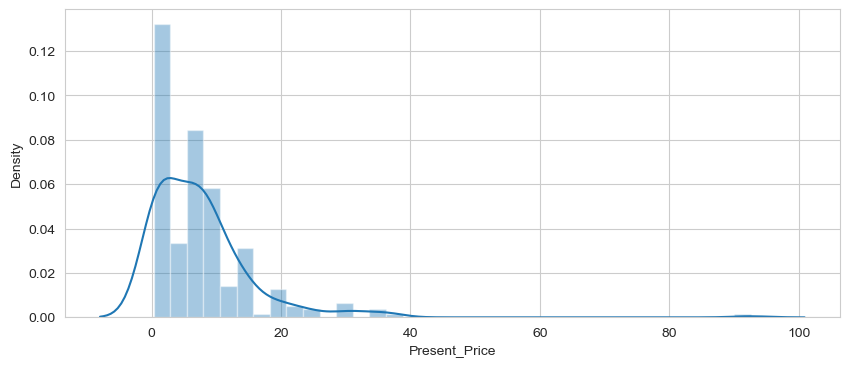

In [13]:
# Distribution of values for Present Price

sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
sns.distplot(df.Present_Price)
plt.show()

In [14]:
car_count = df['Car_Name'].value_counts().reset_index()
car_count.head(10)

,Car_Name,count
0,city,26
1,corolla altis,16
2,verna,14
3,fortuner,11
4,brio,10
5,ciaz,9
6,innova,9
7,i20,9
8,grand i10,8
9,jazz,7


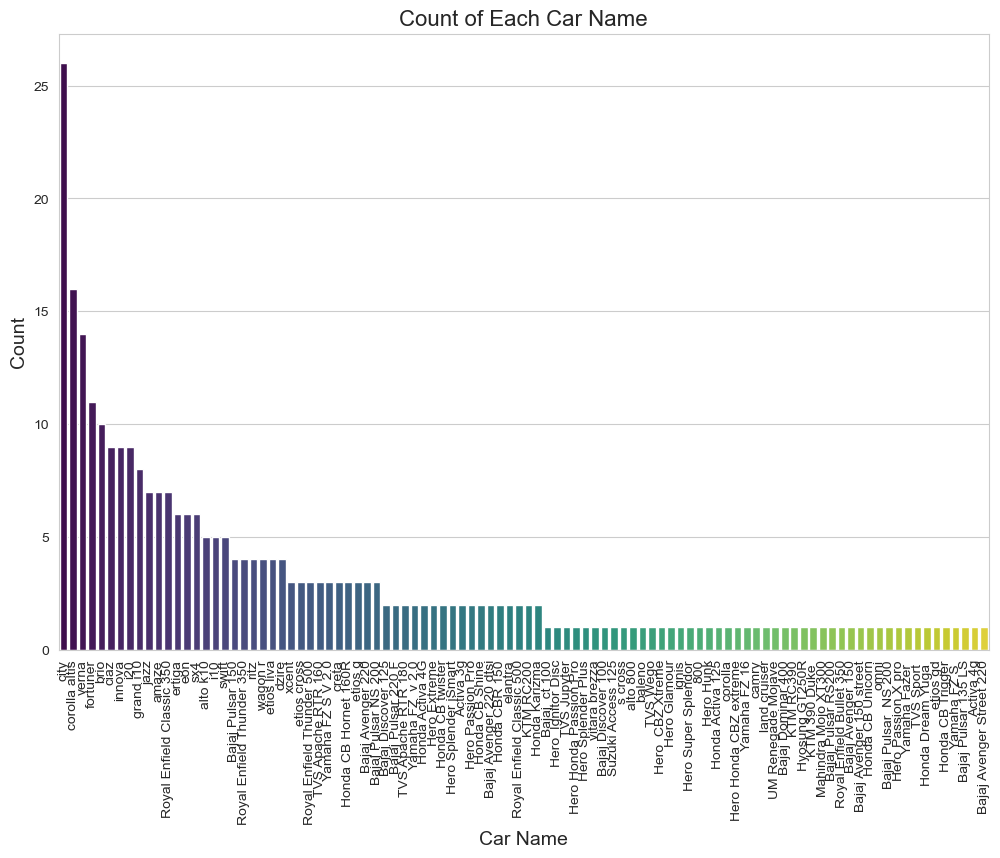

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Car_Name', order=df['Car_Name'].value_counts().index, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.title('Count of Each Car Name', fontsize=16)
plt.xlabel('Car Name', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

> `City` car has the highest count, followed by `Corolla Altis`, `Verna`, `Fortuner` and `Brio`

## 3.1 Correlation among all the features

In [16]:
correlation_matrix = df[['Year','Selling_Price','Present_Price','Driven_kms','Owner']]

correlations = correlation_matrix.corr()
correlations

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


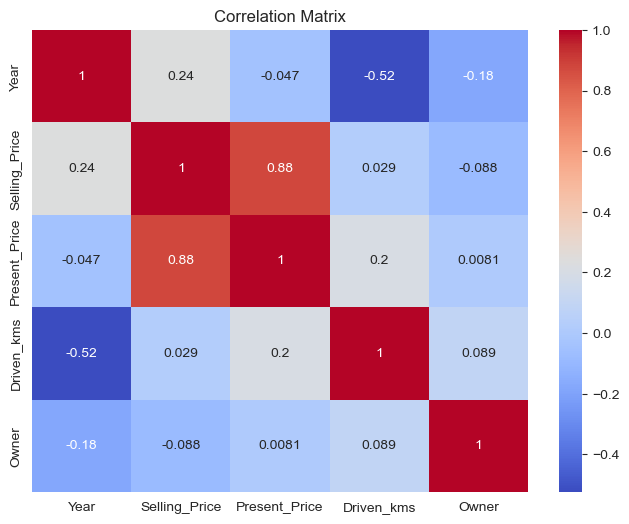

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

> Highly Correlated Features are - Selling_Price & Present_Price = 0.88

## 3.2 Visualizing Categorical Data

In [18]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [19]:
df['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [20]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [21]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

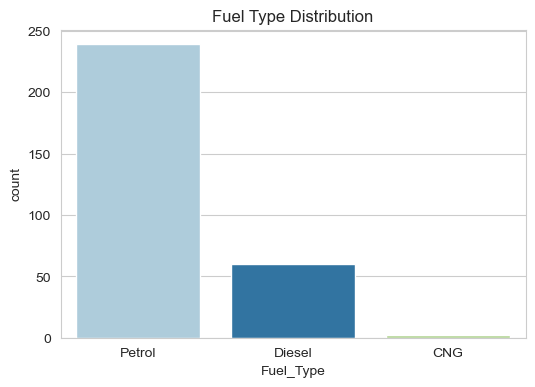

In [22]:
# Bar plot for Fuel_type

plt.figure(figsize=(6,4))
sns.countplot(x='Fuel_Type', data=df, palette='Paired')
plt.title('Fuel Type Distribution')
plt.show()

> The Fuel Type - `Petrol` has the highest count.

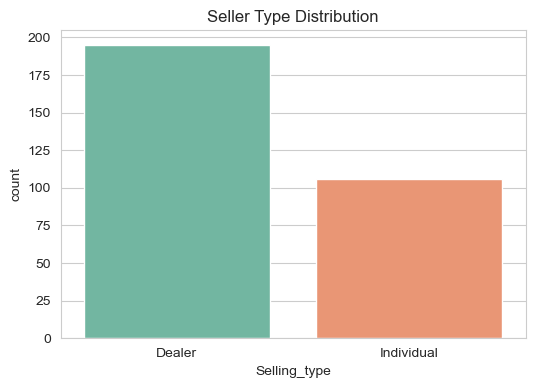

In [23]:
# Bar plot for Seller_type
plt.figure(figsize=(6,4))
sns.countplot(x='Selling_type', data=df, palette='Set2')
plt.title('Seller Type Distribution')
plt.show()

> `Dealer`s has higher seller counts.

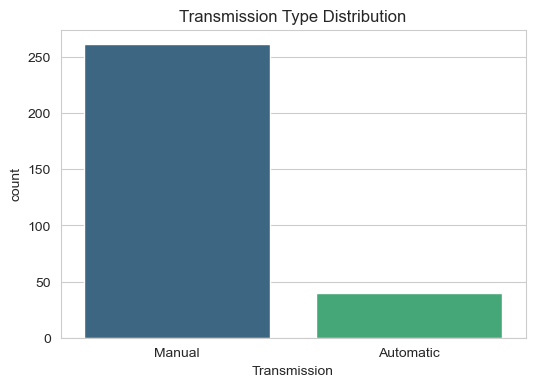

In [24]:
# Bar plot for Transmission
plt.figure(figsize=(6,4))
sns.countplot(x='Transmission', data=df, palette='viridis')
plt.title('Transmission Type Distribution')
plt.show()

> `Manual` transmission type has higher counts than Automatic

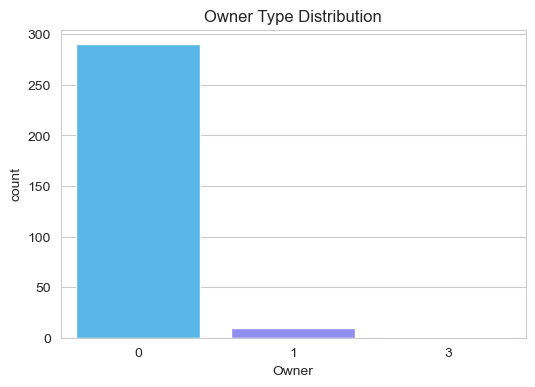

In [25]:
# Bar plot for Owner
plt.figure(figsize=(6,4))
sns.countplot(x='Owner', data=df, palette='cool')
plt.title('Owner Type Distribution')
plt.show()

> `Owner 0` has highest count compared to others.

To calculate the vehicle age, we are adding a new column and difference of current year and vehicle’s year will be the age of vehicle.

In [26]:
df['Current Year'] = 2024
df['Car Age'] = df['Current Year'] - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Current Year,Car Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


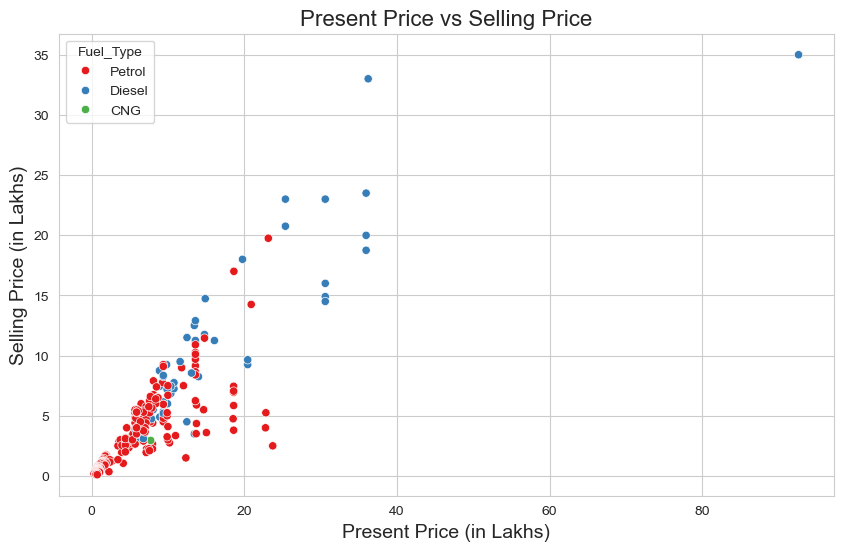

In [27]:
# Set the plot size
plt.figure(figsize=(10,6))

# Scatter plot for Present Price vs Selling Price
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, hue='Fuel_Type', palette='Set1')

# Set plot title and labels
plt.title('Present Price vs Selling Price', fontsize=16)
plt.xlabel('Present Price (in Lakhs)', fontsize=14)
plt.ylabel('Selling Price (in Lakhs)', fontsize=14)

# Show the plot
plt.show()

> `Present Price` of a car directly influences `Selling Price` prediction

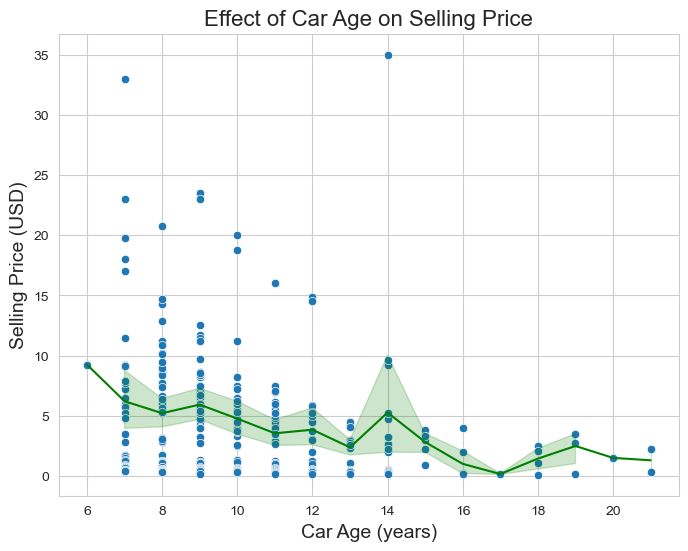

In [28]:
# Create the plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Car Age', y='Selling_Price', data=df, palette='Set1')
sns.lineplot(x='Car Age', y='Selling_Price', data=df, color='green') 

plt.title('Effect of Car Age on Selling Price', fontsize=16)
plt.xlabel('Car Age (years)', fontsize=14)
plt.ylabel('Selling Price (USD)', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

> `Car Age` is affecting <b>Negatively</b> as the `Selling Price` <b>decreases</b> for an older car.

# 4. Feature Importance

In [29]:
# Identify features (X) and target variable (y)
X = df[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Car Age']]
y = df['Selling_Price']

# Handle categorical features using one-hot encoding (if needed)
X = pd.get_dummies(X)


In [30]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

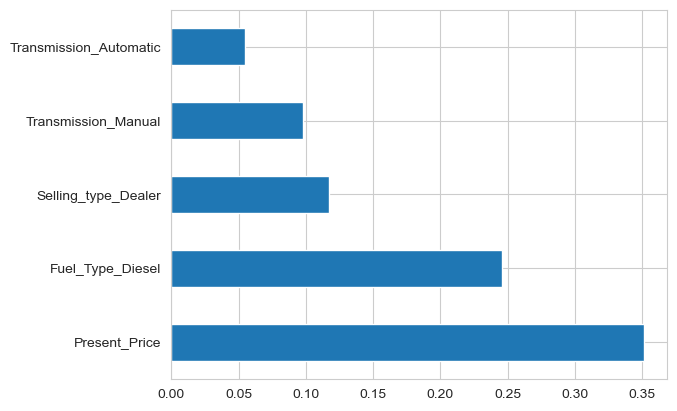

In [31]:
feat_impo = pd.Series(model.feature_importances_, index=X.columns)
feat_impo.nlargest(5).plot(kind='barh')
plt.show()

> Here we can see `Present Price` is more important than other features.

### 4.1 Now split the data into train and test for building a model.

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure feature names match between training and testing datasets
missing_features = set(X_train.columns) - set(X_test.columns)
for feature in missing_features:
    X_test[feature] = 0

In [33]:
# Scale features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

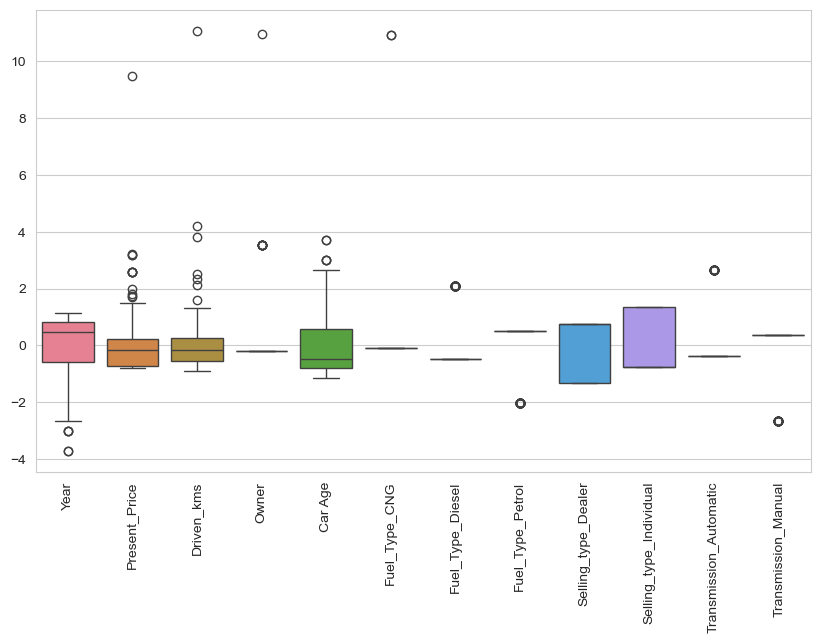

In [34]:
# Visualize scaled features

plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(X_train_scaled, columns=X_train.columns))
plt.xticks(rotation=90)
plt.show()

# 5. Building Model

I will use the Random Forest Regressor Algorithm

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

regressor = RandomForestRegressor()

In [36]:
# train the model

regressor.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Max number of levels in a tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

# Min number of samples required to split the node
min_sample_split = [2,5,10,15,100]

# Min number of samples required at each leaf node
min_sample_leaf = [1,2,5,10]

# Creating a random grid
random_grid = { 'n_estimators': n_estimators,
               'max_features': max_features, 
               'max_depth': max_depth,
               'min_samples_split': min_sample_split,
               'min_samples_leaf': min_sample_leaf }

rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

## 5.1 Making Predictions and Evaluating the Model

In [38]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model on the test data
print('Test MSE:', mean_squared_error(y_test, y_pred))
print('Test R^2:', r2_score(y_test, y_pred))

Test MSE: 0.8390617240983614
Test R^2: 0.9635754098898902


In [39]:
# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Evaluate the model on the training data
print('Train MSE:', mean_squared_error(y_train, y_train_pred))
print('Train R^2:', r2_score(y_train, y_train_pred))

Train MSE: 2.7467503730820573e-29
Train R^2: 1.0


## 5.2 Printing y_pred the order of feature names for both the training and testing datasets

In [40]:
# Print the order of feature names for training dataset
print("Training Feature Names:")
print(X_train.columns)

# Print the order of feature names for testing dataset
print("\nTesting Feature Names:")
print(X_test.columns)

Training Feature Names:
Index(['Year', 'Present_Price', 'Driven_kms', 'Owner', 'Car Age',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Selling_type_Dealer', 'Selling_type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

Testing Feature Names:
Index(['Year', 'Present_Price', 'Driven_kms', 'Owner', 'Car Age',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Selling_type_Dealer', 'Selling_type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')


## Test the Model with Custom Data

In [41]:
# Test the model with custom data
custom_data = pd.DataFrame({
    'Year': [2018],
    'Present_Price': [10.0],
    'Driven_kms': [50000],
    'Owner': [0],
    'Car Age': [4],
    'Fuel_Type_CNG': [0],
    'Fuel_Type_Diesel': [0],
    'Fuel_Type_Petrol': [1],
    'Selling_type_Dealer': [0],
    'Selling_type_Individual': [1],
    'Transmission_Automatic': [0],
    'Transmission_Manual': [1]
})

custom_prediction = regressor.predict(custom_data)

print(f"Predicted Selling Price for Custom Data: {custom_prediction[0]:.2f}")

Predicted Selling Price for Custom Data: 7.67
